In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-06-17 20:36:21.147862: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 20:36:21.147989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 20:36:21.415459: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
image_height, image_width = 256, 256
batch_size = 32

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (image_height, image_width)  
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (image_height, image_width)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
print(train_ds.class_names)

['cats', 'dogs']


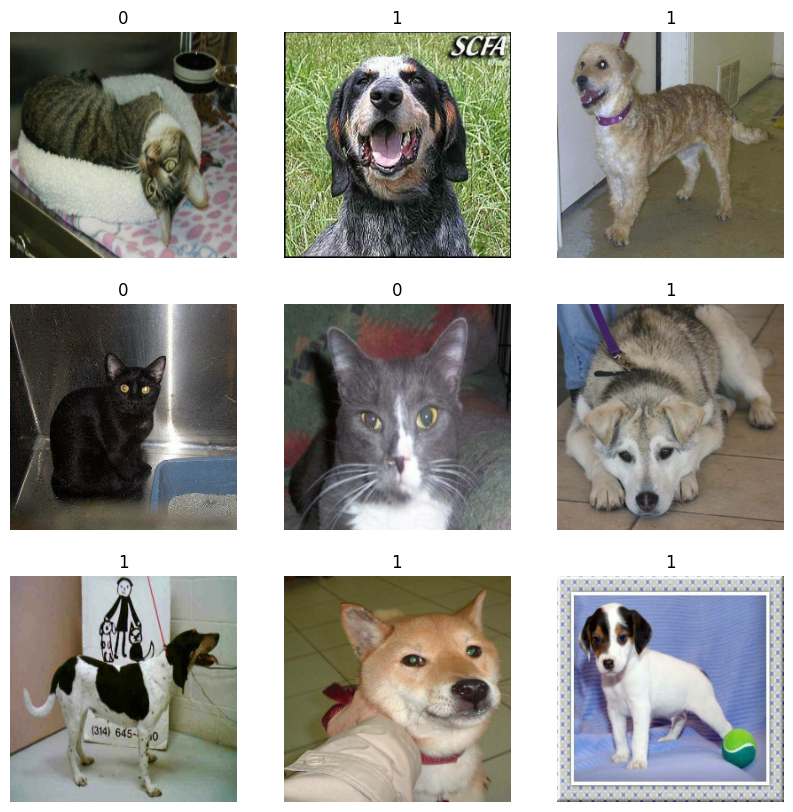

In [5]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(int(label[i]))
    plt.axis("off")

# Simple CNN without Data Augmentation

In [6]:
# create CNN model

model = Sequential()

model.add(Rescaling(1./255, input_shape=(image_height, image_width, 3)))

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
  3/625 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - accuracy: 0.5278 - loss: 1.4204

I0000 00:00:1718656643.647517      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718656643.666293      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5760 - loss: 0.6999

W0000 00:00:1718656684.393524      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 81ms/step - accuracy: 0.5761 - loss: 0.6998 - val_accuracy: 0.7006 - val_loss: 0.5844
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.7078 - loss: 0.5665 - val_accuracy: 0.7518 - val_loss: 0.5152
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7858 - loss: 0.4515 - val_accuracy: 0.7674 - val_loss: 0.5265
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8718 - loss: 0.2923 - val_accuracy: 0.7586 - val_loss: 0.7696
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9399 - loss: 0.1561 - val_accuracy: 0.7462 - val_loss: 1.1255
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9670 - loss: 0.0902 - val_accuracy: 0.7470 - val_loss: 1.2322
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9807 - loss: 0.0636 - val_accuracy: 0.7374 - val_loss: 1.3433
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9856 - loss: 0.0436 - val_accurac

In [10]:
import os
os.makedirs("models/Simple_CNN")
os.chdir('/kaggle/working/models')

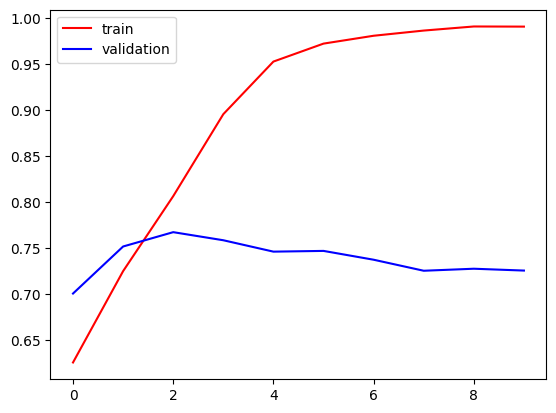

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.savefig("/kaggle/working/models/Simple_CNN/accuracy")
plt.show()

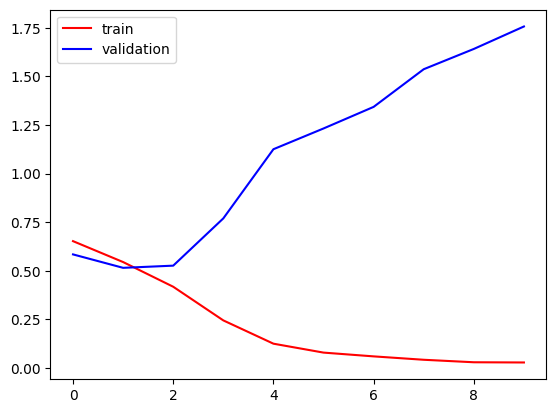

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.savefig("/kaggle/working/models/Simple_CNN/loss")
plt.show()

In [13]:
model.save('Simple_CNN/model.h5')

# Simple CNN with Data Augmentation
### Augmentation on image data added as layer

In [14]:
from keras.layers import Rescaling, Resizing, RandomFlip, RandomRotation, RandomZoom, RandomTranslation, RandomContrast, Input

In [15]:
# # !!!!!!!!!!!!!!! This is the menthod of generator which is depriciated
# train_datagen = ImageDataGenerator(
#     rescale = 1./255,
#     rotation_range=40,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     fill_mode='nearest'
# )

# test_datagen = ImageDataGenerator(rescale = 1./255)

# train_ds = train_datagen.flow_from_directory(
#     '/kaggle/input/dogs-vs-cats/train',
#     target_size=(image_width, image_height),
#     batch_size=32,
#     class_mode='binary')

# validation_ds = test_datagen.flow_from_directory(
#     '/kaggle/input/dogs-vs-cats/test',
#     target_size=(image_width, image_height),
#     batch_size=32,
#     class_mode='binary')

# Model = Sequential()
# Model HERE

# epochs = 10
# steps_per_epoch = len(train_ds)
# for epoch in range(epochs):
#     print(f"Epoch {epoch+1}/{epochs}")
    
#     # Reset the generator at the beginning of each epoch
#     train_ds.reset()

#     # Fit the model using the generator
#     model.fit(train_ds, steps_per_epoch=20000//32, epochs=1)

In [16]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
#     image_size = (image_height, image_width)  
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
#     image_size = (image_height, image_width)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


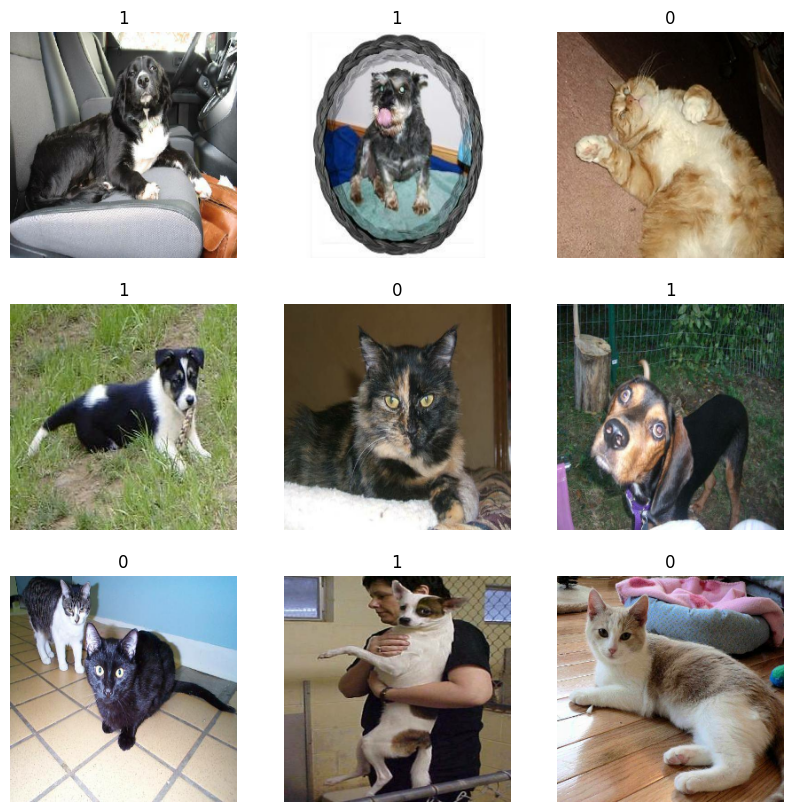

In [17]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(int(label[i]))
    plt.axis("off")

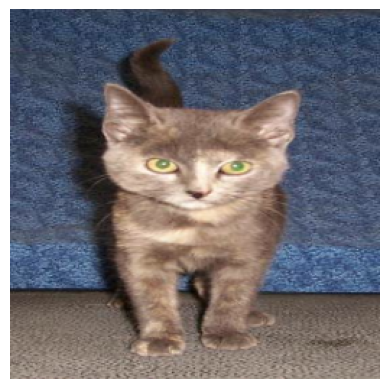

In [18]:
# Fetch a single batch of data
image_batch, label_batch = next(iter(train_ds))

# Select the first image and its label from the batch
image = image_batch[0]
label = label_batch[0]

# Display the image
plt.imshow(image.numpy().astype('uint8'))
plt.axis('off')  # Optional: Turn off the axis
plt.show()

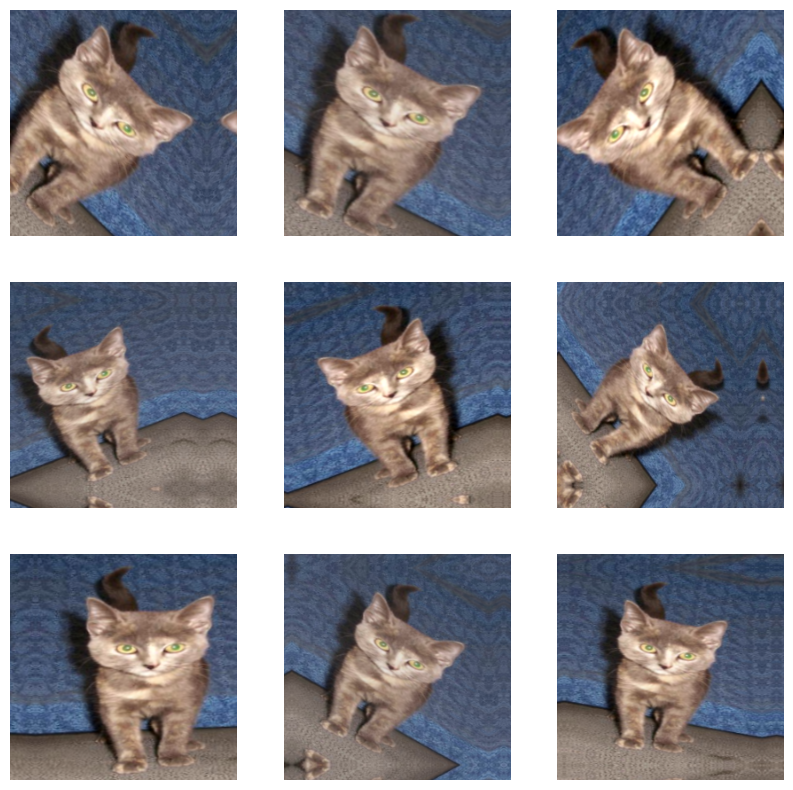

In [19]:
out_height, out_width = 128, 256

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.3),
    RandomTranslation(0, 0.2),
    RandomContrast(0.2),
])


plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image.numpy().astype('uint8'))
  plt.axis("off")

In [20]:
# create CNN model

model = Sequential()

# Resizing and Rescalling
model.add(Input(shape=(image_height, image_width, 3)))
model.add(Resizing(image_width, image_height))    
model.add(Rescaling(1./255))

# Data Augmentation Layer
# model.add(data_augmentation)
model.add(RandomFlip("horizontal"))
model.add(RandomRotation(0.2))
model.add(RandomZoom(0.3))
model.add(RandomTranslation(height_factor=0, width_factor=0.2))
model.add(RandomContrast(0.2))

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))
# model.add(GlobalMaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_1            │ (None, 256, 256, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ (None, 256, 256, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
epochs=10
history_1 = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 83ms/step - accuracy: 0.5243 - loss: 0.7510 - val_accuracy: 0.5448 - val_loss: 0.6918
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.5935 - loss: 0.6676 - val_accuracy: 0.6544 - val_loss: 0.6384
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6401 - loss: 0.6392 - val_accuracy: 0.6860 - val_loss: 0.5957
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.6649 - loss: 0.6200 - val_accuracy: 0.6974 - val_loss: 0.5761
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6831 - loss: 0.5990 - val_accuracy: 0.6944 - val_loss: 0.5700
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6963 - loss: 0.5775 - val_accuracy: 0.7500 - val_loss: 0.5092
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7088 - loss: 0.5616 - val_accuracy: 0.7644 - val_loss: 0.4995
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7333 - loss: 0.5280 - 

In [24]:
os.makedirs("Simple_CNN_Data_Augmentation")

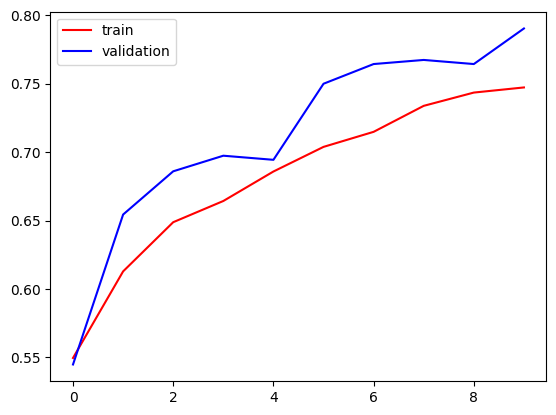

In [25]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['accuracy'], color = 'red', label = 'train')
plt.plot(history_1.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.savefig("/kaggle/working/models/Simple_CNN_Data_Augmentation/accuracy")
plt.show()

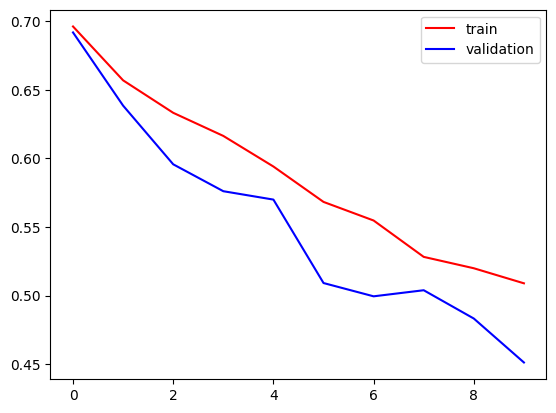

In [26]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['loss'], color = 'red', label = 'train')
plt.plot(history_1.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.savefig("/kaggle/working/models/Simple_CNN_Data_Augmentation/loss")
plt.show()

In [27]:
model.save('Simple_CNN_Data_Augmentation/model.keras')

# Applying Transfer Learning with Data Augmentation
 ### *By Training on State-of-Art VGG 16*

### Approach 1) Feature Extraction

In [28]:
from keras.applications.vgg16 import VGG16

In [29]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False, # Not importing FC layers
    input_shape = (256, 256, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model = Sequential()

# Rescaling layer
model.add(Rescaling(1./255, input_shape=(image_height, image_width, 3)))

# Data Augmentation Layer
# model.add(data_augmentation)
model.add(RandomFlip("horizontal"))
model.add(RandomRotation(0.2))
model.add(RandomZoom(0.3))
model.add(RandomTranslation(height_factor=0, width_factor=0.2))
model.add(RandomContrast(0.2))

# VGG 16
model.add(conv_base)

# Fully Connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_2 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_2 (RandomZoom)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_2            │ (None, 256, 256, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_2               │ (None, 256, 256, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,103,809 (88.13 MB)

 Trainable params: 23,103,809 (88.13 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
conv_base.trainable = False # avoid training the conv base for feature extraction

In [34]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_2 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_2 (RandomZoom)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_2            │ (None, 256, 256, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_2               │ (None, 256, 256, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,103,809 (88.13 MB)

 Trainable params: 8,389,121 (32.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [35]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (image_height, image_width)  
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (image_height, image_width)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [36]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
epochs=10
history_2 = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 261ms/step - accuracy: 0.7866 - loss: 0.6263 - val_accuracy: 0.9150 - val_loss: 0.2037
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 252ms/step - accuracy: 0.8458 - loss: 0.3535 - val_accuracy: 0.9348 - val_loss: 0.1623
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8645 - loss: 0.3112 - val_accuracy: 0.9346 - val_loss: 0.1630
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 252ms/step - accuracy: 0.8744 - loss: 0.2847 - val_accuracy: 0.9344 - val_loss: 0.1619
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8798 - loss: 0.2794 - val_accuracy: 0.9348 - val_loss: 0.1576
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 254ms/step - accuracy: 0.8762 - loss: 0.2835 - val_accuracy: 0.9302 - val_loss: 0.1616
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 252ms/step - accuracy: 0.8795 - loss: 0.2732 - val_accuracy: 0.9374 - val_loss: 0.1526
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 254ms/step - accuracy: 0.8819 -

In [38]:
os.makedirs("VGG16_feature_extraction_Data_Augmentation")

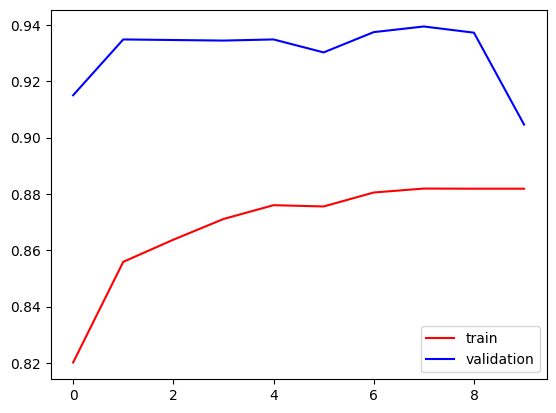

In [39]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['accuracy'], color = 'red', label = 'train')
plt.plot(history_2.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.savefig("/kaggle/working/models/VGG16_feature_extraction_Data_Augmentation/accuracy")
plt.show()

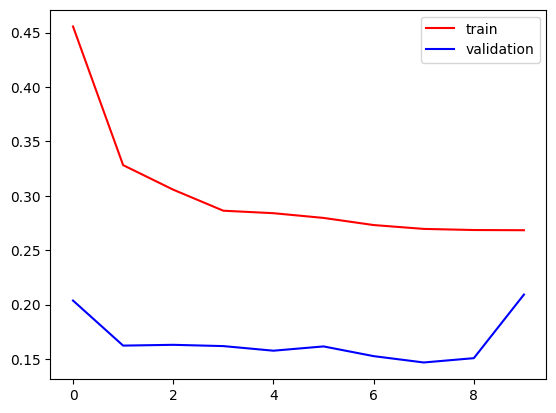

In [40]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['loss'], color = 'red', label = 'train')
plt.plot(history_2.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.savefig("/kaggle/working/models/VGG16_feature_extraction_Data_Augmentation/loss")
plt.show()

In [41]:
model.save("VGG16_feature_extraction_Data_Augmentation/model.keras")

### Approach 2) Fine Tunning

In [42]:
conv_base.trainable = True
 
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
for layer in conv_base.layers:
    print(layer.name, layer.trainable)

input_layer_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [43]:
model = Sequential()

# Rescaling layer
model.add(Rescaling(1./255, input_shape=(image_height, image_width, 3)))

# Data Augmentation Layer
# model.add(data_augmentation)
model.add(RandomFlip("horizontal"))
model.add(RandomRotation(0.2))
model.add(RandomZoom(0.3))
model.add(RandomTranslation(height_factor=0, width_factor=0.2))
model.add(RandomContrast(0.2))

# VGG 16
model.add(conv_base)

# Fully Connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [44]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.00001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [45]:
epochs=10
history_3 = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 274ms/step - accuracy: 0.7811 - loss: 0.4376 - val_accuracy: 0.9416 - val_loss: 0.1444
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 274ms/step - accuracy: 0.9076 - loss: 0.2252 - val_accuracy: 0.9602 - val_loss: 0.1005
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 212s 291ms/step - accuracy: 0.9209 - loss: 0.1943 - val_accuracy: 0.9630 - val_loss: 0.0926
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 274ms/step - accuracy: 0.9319 - loss: 0.1695 - val_accuracy: 0.9694 - val_loss: 0.0772
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 274ms/step - accuracy: 0.9347 - loss: 0.1610 - val_accuracy: 0.9710 - val_loss: 0.0768
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 273ms/step - accuracy: 0.9440 - loss: 0.1463 - val_accuracy: 0.9728 - val_loss: 0.0671
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 274ms/step - accuracy: 0.9437 - loss: 0.1412 - val_accuracy: 0.9682 - val_loss: 0.0813
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 274ms/step - accuracy: 0.9497 -

In [46]:
os.makedirs("VGG16_fine_tunning_Data_Augmentation")

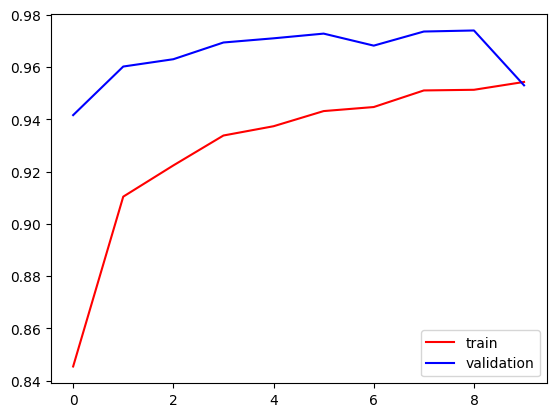

In [47]:
import matplotlib.pyplot as plt

plt.plot(history_3.history['accuracy'], color = 'red', label = 'train')
plt.plot(history_3.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.savefig("/kaggle/working/models/VGG16_fine_tunning_Data_Augmentation/accuracy")
plt.show()

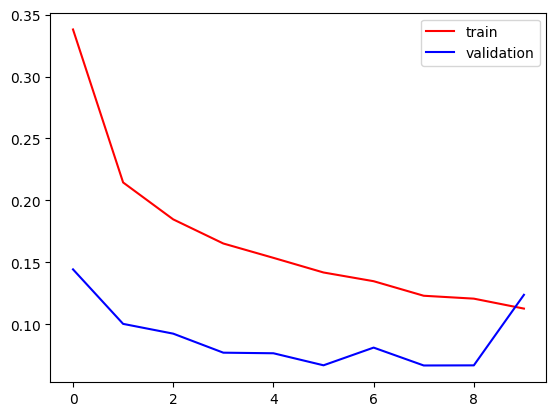

In [48]:
import matplotlib.pyplot as plt

plt.plot(history_3.history['loss'], color = 'red', label = 'train')
plt.plot(history_3.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.savefig("/kaggle/working/models/VGG16_fine_tunning_Data_Augmentation/loss")
plt.show()

In [49]:
model.save("VGG16_fine_tunning_Data_Augmentation/model.keras")

## Downloading Models and Directories

In [50]:
os.chdir('/kaggle/working')
!zip -r file.zip /kaggle/working

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/models/ (stored 0%)
  adding: kaggle/working/models/VGG16_fine_tunning_Data_Augmentation/ (stored 0%)
  adding: kaggle/working/models/VGG16_fine_tunning_Data_Augmentation/loss.png (deflated 10%)
  adding: kaggle/working/models/VGG16_fine_tunning_Data_Augmentation/model.keras (deflated 7%)
  adding: kaggle/working/models/VGG16_fine_tunning_Data_Augmentation/accuracy.png (deflated 12%)
  adding: kaggle/working/models/Simple_CNN/ (stored 0%)
  adding: kaggle/working/models/Simple_CNN/loss.png (deflated 10%)
  adding: kaggle/working/models/Simple_CNN/accuracy.png (deflated 10%)
  adding: kaggle/working/models/Simple_CNN/model.h5 (deflated 24%)
  adding: kaggle/working/models/Simple_CNN_Data_Augmentation/ (stored 0%)
  adding: kaggle/working/models/Simple_CNN_Data_Augmentation/loss.png (deflated 9%)
  adding: kaggle/working/models/Simple_CNN_Data_Augmentation/model.keras (deflated 13%)
  adding: kaggle/working/models/Simple_CNN_